In [1]:
from mylib import heat_transport as ht
from mylib import hydro_funcs as hf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Read in the temperature time series:

In [2]:
df = pd.read_csv("rod_2_cleaned.csv")
df.index = pd.to_datetime(df['Date/Time'])
df = df[['0', '10', '20']]
df.head()

,0,10,20
Date/Time,,,
2018-02-14 18:00:00,26.78125,23.21850,21.42175
2018-02-14 19:00:00,25.14075,23.42200,21.59375
2018-02-14 20:00:00,23.03125,23.45325,21.75025
2018-02-14 21:00:00,21.24975,23.21850,21.90650
2018-02-14 22:00:00,20.07825,22.93725,22.00000


Define the parametres:

In [3]:
z = 0.1
q = -5e-6
Ke = 5e-7
PwCw = 4180 * 1000
PsCs = 800 * 2600
n = 0.3
dt = 3600
T = df.iloc[0].values
pc = hf.pc_(n, PwCw, PsCs)

Initialise the model class and calculate the maximum stable time step to check the time step is stable:

In [4]:
model = ht.NumericalTransport(z, dt, PwCw, pc, Ke)
model.max_timestep()

10000.000000000002

Calculate the total iterations in this case it is a 14 day model with one iteration each hour:

In [5]:
total_time = 14 * 24 * 60 * 60
n_iterations = int(total_time / dt)
n_iterations

336

Sellect the top and bottom boundary conditions. In this case the top boundary is 0 cm and the bottom 20 cm.

In [6]:
top_bc = df["0"].values[0:n_iterations]
bot_bc = df['20'].values[0:n_iterations]

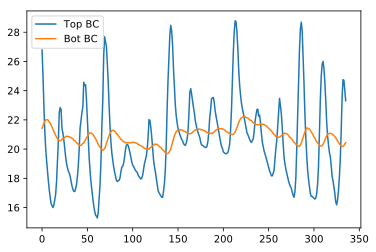

In [7]:
plt.plot(top_bc, label ='Top BC')
plt.plot(bot_bc, label = 'Bot BC')
plt.legend();

Sellect the model method and enter the parametres:

In [8]:
result = model.model(q, T, n_iterations, top_bc, bot_bc)

Evaluate the model output:

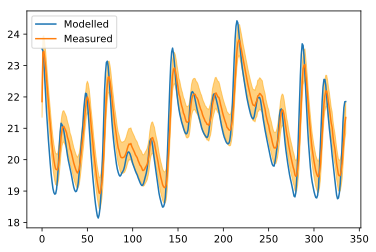

In [9]:
result[1][0.1].plot(label = 'Modelled')
plt.plot(df['10'].values[0:n_iterations], label = "Measured")
plt.fill_between(np.linspace(0,n_iterations-1, n_iterations), df['10'].values[0:n_iterations] - 0.5, df['10'].values[0:n_iterations] + 0.5, 
                 edgecolor = 'Orange',facecolor ='Orange', alpha = 0.5)
plt.legend();